In [1]:
from deepbench.astro_object import SpiralGalaxyObject
from deepbench.astro_object import GalaxyObject
from deepbench.astro_object import StarObject
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
def add_poisson_noise(image: np.array, snr: float) -> np.array:
    """
    Adds Poisson noise to an image with a specified intensity.

    Args:
        image (numpy.ndarray): The input image is a 256 x 256 x 3 numpy array.
        snr (float): Normalized snr value (between 0 and 1)

    Returns:
        numpy.ndarray: The noisy image as a 256 x 256 x 3 numpy array.
    """
    
    if (snr > 1) or (snr < 0):
        raise ValueError('Unphysical SNR value. Specify 0 < snr < 1')
    
    signal_level = np.mean(image)
    noise_level = signal_level / snr - signal_level
    noise = np.random.poisson(lam=noise_level, size=image.shape).astype(np.float64)
    noisy_image = image + noise
    
    # Ensure values are within the correct range
    noisy_image = np.clip(noisy_image, 0, 255)
    
    return noisy_image

In [3]:
dataset_size = 15000
image_size = 100

In [4]:
spirals = np.zeros((dataset_size // 3, image_size, image_size))
noisy_spirals = np.zeros((dataset_size // 3, image_size, image_size))
metadata_columns = ['winding_number', 'noise_level', 'spiral_pitch', 'center_x', 'center_y']
spiral_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    winding_number = np.random.randint(2, 9)
    noise_level = 0.2
    spiral_pitch = np.random.randint(1, 4)
    center_x = np.random.randint(0, image_size)
    center_y = np.random.randint(0, image_size)
    
    metadata = {
        'winding_number': winding_number,
        'noise_level': noise_level,
        'spiral_pitch': spiral_pitch,
        'center_x': center_x,
        'center_y': center_y
    }
    
    spiral_metadata = spiral_metadata.append(metadata, ignore_index=True)

    spiral_galaxy = SpiralGalaxyObject(image_dimensions=(image_size, image_size), 
                                        winding_number=winding_number,
                                        noise_level=0,
                                        spiral_pitch=spiral_pitch)
    
    spiral_img = spiral_galaxy.create_object(center_x = center_x, center_y = center_y)
    noisy_img = add_poisson_noise(spiral_img, noise_level)
    spirals[i] = spiral_img
    noisy_spirals[i] = noisy_img
    

100%|██████████| 5000/5000 [00:05<00:00, 844.88it/s]


In [5]:
blobs = np.zeros((dataset_size // 3, image_size, image_size))
noisy_blobs = np.zeros((dataset_size // 3, image_size, image_size))

metadata_columns = ['radius', 'n', 'ellipse', 'theta', 'center_x', 'center_y']
blob_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    radius = np.random.randint(10, 100)
    n = np.random.uniform(0.5, 1.5)
    ellipse = np.random.uniform(0.1,0.9)
    theta = np.random.uniform(-1.5, 1.5)
    noise_level = 0.2
    center_x = np.random.randint(0, image_size)
    center_y = np.random.randint(0, image_size)
    
    metadata = {'radius': radius,
                'n': n,
                'ellipse': ellipse,
                'theta': theta,
                'center_x': center_x,
                'center_y': center_y}
    blob_metadata = spiral_metadata.append(metadata, ignore_index=True)

    blob_galaxy = GalaxyObject(image_dimensions=(100,100), 
                                        noise_level=0.0,
                                        n = n,
                                        ellipse=ellipse,
                                        theta = theta,
                                        radius=radius)
        
    img = blob_galaxy.create_object(center_x = center_x, center_y = center_y)
    noisy_img = add_poisson_noise(img, noise_level)
    blobs[i] = img
    noisy_blobs[i] = noisy_img

100%|██████████| 5000/5000 [00:08<00:00, 563.44it/s]


In [6]:
stars = np.zeros((dataset_size // 3, image_size, image_size))
noisy_stars = np.zeros((dataset_size // 3, image_size, image_size))

metadata_columns = ['radius', 'amplitude', 'num_stars', 'center_x', 'center_y']
star_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    radius = np.random.randint(1, 10)
    noise_level = 0.2
    num_stars = np.random.randint(1, 10)
    center_x = np.random.randint(0, image_size, size = num_stars)
    center_y = np.random.randint(0, image_size, size = num_stars)
    amplitude = np.random.uniform(1, 50)
    
    metadata = {'radius': radius,
                'amplitude': amplitude,
                'center_x': center_x,
                'num_stars': num_stars,
                'center_y': center_y}
    star_metadata = star_metadata.append(metadata, ignore_index=True)

    star = StarObject(
        image_dimensions = (image_size, image_size),
        radius = radius,
        amplitude = amplitude
    )
    
    generated_stars = []
    for x_pos, y_pos in zip(center_x, center_y):
        generated_stars.append(star.create_object(x_pos, y_pos))
        
    
    img = np.sum(generated_stars, axis=0)
    noisy_img = add_poisson_noise(img, noise_level)
    stars[i] = img
    noisy_stars[i] = noisy_img

100%|██████████| 5000/5000 [00:18<00:00, 270.13it/s]


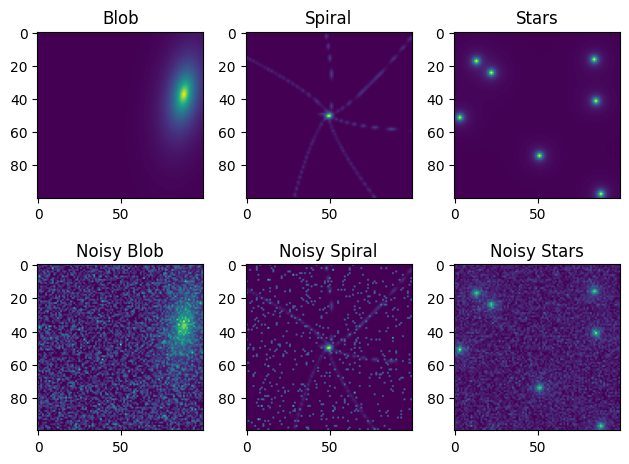

In [7]:
idx = np.random.randint(0, 5000)

fig, ax = plt.subplots(2, 3)

ax[0,0].imshow(blobs[idx])
ax[0,0].set_title('Blob')
ax[1,0].imshow(noisy_blobs[idx])
ax[1,0].set_title('Noisy Blob')
ax[0,1].imshow(spirals[idx])
ax[0,1].set_title('Spiral')
ax[1,1].imshow(noisy_spirals[idx])
ax[1,1].set_title('Noisy Spiral')
ax[0,2].imshow(stars[idx])
ax[0,2].set_title('Stars')
ax[1,2].imshow(noisy_stars[idx])
ax[1,2].set_title('Noisy Stars')

plt.tight_layout()

In [11]:
data = np.concatenate((blobs, spirals, stars), axis=0)
labels = np.concatenate((np.zeros(5000), np.ones(5000), np.ones(5000) * 2))
noisy_data = np.concatenate((noisy_blobs, noisy_spirals, noisy_stars), axis=0)
noisy_labels = np.concatenate((np.zeros(5000), np.ones(5000), np.ones(5000) * 2))

In [12]:
print(data.shape, labels.shape, noisy_data.shape, noisy_labels.shape)

(15000, 100, 100) (15000,) (15000, 100, 100) (15000,)


In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_train_noisy, x_test_noisy, y_train_noisy, y_test_noisy= train_test_split(noisy_data, noisy_labels, test_size=0.2, random_state=42)

In [21]:
import pandas as pd
import numpy as np
# Define the calibration metrics as a dictionary for easier calculations
data = {
    "Dataset": [
        "Shapes", "Shapes", "Shapes", "Shapes", "Astro Objects", "Astro Objects", 
        "Astro Objects", "Astro Objects", "MNISTM (Noise)", "MNISTM (Noise)",
        "MNISTM (Noise)", "MNISTM (Noise)", "MNISTM (PSF)", "MNISTM (PSF)",
        "MNISTM (PSF)", "MNISTM (PSF)", "Galaxy Zoo Evo", "Galaxy Zoo Evo", 
        "Galaxy Zoo Evo", "Galaxy Zoo Evo"
    ],
    "Metric": [
        "ECE", "Brier", "ECE", "Brier", "ECE", "Brier", "ECE", "Brier", 
        "ECE", "Brier", "ECE", "Brier", "ECE", "Brier", "ECE", "Brier", 
        "ECE", "Brier", "ECE", "Brier"
    ],
    "CNN": [
        0.011, 0.000734, 0.35, 0.110, 0.041, 0.00798, 0.17, 0.0440, 
        0.161, 0.00991, 0.409, 0.0450, 0.161, 0.00991, 0.384, 0.0340, 
        0.283, 0.0453, 0.324, 0.0538
    ],
    "CNN-DA": [
        0.013, 0.00112, 0.29, 0.0925, 0.075, 0.0220, 0.142, 0.0420, 
        0.126, 0.00880, 0.355, 0.0370, 0.124, 0.00850, 0.272, 0.0230, 
        0.264, 0.0439, 0.301, 0.051
    ],
    "D4": [
        0.011, 0.000814, 0.20, 0.0564, 0.00695, 0.000132, 0.294, 0.0804, 
        0.114, 0.00610, 0.390, 0.0410, 0.114, 0.00610, 0.340, 0.0270, 
        0.2322, 0.0341, 0.271, 0.0411
    ],
    "D4-DA": [
        0.0074, 0.000349, 0.013, 0.0015, 0.00899, 0.000746, 0.053, 0.0150, 
        0.0790, 0.00481, 0.250, 0.0210, 0.0750, 0.00400, 0.181, 0.0130, 
        0.206, 0.0319, 0.241, 0.0382
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate improvements for CNN-DA and D4-DA
df["CNN_Improvement"] = (2 * np.abs(df['CNN'] - df["CNN-DA"])) / (df['CNN'] + df["CNN-DA"]) * 100
df["D4_Improvement"] = (2 * np.abs(df['D4'] - df["D4-DA"])) / (df['D4'] + df["D4-DA"]) * 100

# Find the best improvements for ECE and Brier metrics
best_improvement_cnn_ece = df[(df["Metric"] == "ECE")]["CNN_Improvement"].max()
best_improvement_cnn_brier = df[(df["Metric"] == "Brier")]["CNN_Improvement"].max()
best_improvement_d4_ece = df[(df["Metric"] == "ECE")]["D4_Improvement"].max()
best_improvement_d4_brier = df[(df["Metric"] == "Brier")]["D4_Improvement"].max()

# Combine the results
best_improvements = {
    "Best CNN-DA ECE Improvement": best_improvement_cnn_ece,
    "Best CNN-DA Brier Improvement": best_improvement_cnn_brier,
    "Best D4-DA ECE Improvement": best_improvement_d4_ece,
    "Best D4-DA Brier Improvement": best_improvement_d4_brier
}

# Find the rows corresponding to the maximum improvements
best_cnn_ece_row = df[(df["Metric"] == "ECE") & (df["CNN_Improvement"] == best_improvement_cnn_ece)]
best_cnn_brier_row = df[(df["Metric"] == "Brier") & (df["CNN_Improvement"] == best_improvement_cnn_brier)]
best_d4_ece_row = df[(df["Metric"] == "ECE") & (df["D4_Improvement"] == best_improvement_d4_ece)]
best_d4_brier_row = df[(df["Metric"] == "Brier") & (df["D4_Improvement"] == best_improvement_d4_brier)]

# Extract datasets for these rows
best_datasets = {
    "Best CNN-DA ECE Improvement Dataset": best_cnn_ece_row["Dataset"].iloc[0],
    "Best CNN-DA Brier Improvement Dataset": best_cnn_brier_row["Dataset"].iloc[0],
    "Best D4-DA ECE Improvement Dataset": best_d4_ece_row["Dataset"].iloc[0],
    "Best D4-DA Brier Improvement Dataset": best_d4_brier_row["Dataset"].iloc[0]
}


best_improvements

{'Best CNN-DA ECE Improvement': 58.620689655172406,
 'Best CNN-DA Brier Improvement': 93.52901934623081,
 'Best D4-DA ECE Improvement': 175.5868544600939,
 'Best D4-DA Brier Improvement': 189.63730569948186}

In [22]:
best_datasets

{'Best CNN-DA ECE Improvement Dataset': 'Astro Objects',
 'Best CNN-DA Brier Improvement Dataset': 'Astro Objects',
 'Best D4-DA ECE Improvement Dataset': 'Shapes',
 'Best D4-DA Brier Improvement Dataset': 'Shapes'}

In [23]:
# Filter the DataFrame for MNIST datasets
mnist_df = df[df["Dataset"].str.contains("MNISTM")]

# Find the best improvements for ECE and Brier metrics
best_mnist_improvement_cnn_ece = mnist_df[mnist_df["Metric"] == "ECE"]["CNN_Improvement"].max()
best_mnist_improvement_cnn_brier = mnist_df[mnist_df["Metric"] == "Brier"]["CNN_Improvement"].max()
best_mnist_improvement_d4_ece = mnist_df[mnist_df["Metric"] == "ECE"]["D4_Improvement"].max()
best_mnist_improvement_d4_brier = mnist_df[mnist_df["Metric"] == "Brier"]["D4_Improvement"].max()

# Combine the results
best_mnist_improvements = {
    "Best MNIST CNN-DA ECE Improvement": best_mnist_improvement_cnn_ece,
    "Best MNIST CNN-DA Brier Improvement": best_mnist_improvement_cnn_brier,
    "Best MNIST D4-DA ECE Improvement": best_mnist_improvement_d4_ece,
    "Best MNIST D4-DA Brier Improvement": best_mnist_improvement_d4_brier
}

print(best_mnist_improvements)

{'Best MNIST CNN-DA ECE Improvement': 34.14634146341463, 'Best MNIST CNN-DA Brier Improvement': 38.596491228070185, 'Best MNIST D4-DA ECE Improvement': 61.03646833013436, 'Best MNIST D4-DA Brier Improvement': 70.0}


In [14]:
# Filter the DataFrame for MNIST datasets
mnist_df = df[df["Dataset"].str.contains("Galaxy Zoo Evo")]

# Find the best improvements for ECE and Brier metrics
best_mnist_improvement_cnn_ece = mnist_df[mnist_df["Metric"] == "ECE"]["CNN_Improvement"].max()
best_mnist_improvement_cnn_brier = mnist_df[mnist_df["Metric"] == "Brier"]["CNN_Improvement"].max()
best_mnist_improvement_d4_ece = mnist_df[mnist_df["Metric"] == "ECE"]["D4_Improvement"].max()
best_mnist_improvement_d4_brier = mnist_df[mnist_df["Metric"] == "Brier"]["D4_Improvement"].max()

# Combine the results
best_mnist_improvements = {
    "Best MNIST CNN-DA ECE Improvement": best_mnist_improvement_cnn_ece,
    "Best MNIST CNN-DA Brier Improvement": best_mnist_improvement_cnn_brier,
    "Best MNIST D4-DA ECE Improvement": best_mnist_improvement_d4_ece,
    "Best MNIST D4-DA Brier Improvement": best_mnist_improvement_d4_brier
}

print(best_mnist_improvements)

{'Best MNIST CNN-DA ECE Improvement': 7.3600000000000065, 'Best MNIST CNN-DA Brier Improvement': 5.343511450381687, 'Best MNIST D4-DA ECE Improvement': 11.958010041077134, 'Best MNIST D4-DA Brier Improvement': 7.3139974779319035}
